# Numerical Integration

Numerical Integration is a very important field inside numerical analysis. It is widely used in engineering to deal with very complicated data, such as transient analysis in a power system. **XNLPY** have the function integral, which is capable of dealing with analytic functions that neather have a closed form integral on a certain interval nor can be integrated easily. In this notebook, we'll demonstrate how this function works applying it to three complicated integrals and talk about it's parameters.

## Theory

There are a lot of algorithms capable of give the numerical value of a definite integral. **XNLPY**'s integral function make use of an adaptive quadrature method that uses the Gauss-Legendre points to approximate the value given a certain tolerance and a certain depth. That is, given a function f integrable at the interval (a,b) and n Gauss-Legendre points, the integral can be approximated by the equation 1.
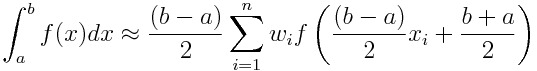(Equation 1)

The algorithm will then use this approximation at certain intervals to reach the required tolerance or until it reaches the depth provided by the user. Here it's valid to warn you that a very large depth and a very small tolerance can make the function stall. Another thing to notice is that for more points the final value will have more precision, but that's not always the case. Some functions have very irregular shape and using less points will make the approximation on tiny intervals better.

## Practice

In this tutorial we'll use three complicated integrals with known closed form to measure the true error. We'll see that it's always less than the estimated error, which is great.

To start, import the modules xnlpy and math and the function default_timer from timeit. The last is used to measure the performance of the integral function. Since we're we're going to measure time, it's good to create a function that execute the integral function a determined number of times and then return the mean time and the standard deviation. This can be done very easily with the statistics module.

In [1]:
import xnlpy as xp
import math as m
from timeit import default_timer as timer
import statistics

def time_integral(iterations, func, a, b, **kwargs):
    points = kwargs.get('points')
    tolerance = kwargs.get('tolerance')
    depth = kwargs.get('depth')
    if (not points): points = 3
    if (not tolerance): tolerance = 1e-9
    if (not depth): depth = 10    
    dt = [None]*iterations
    for i in range(iterations):
        start = timer()
        result, error = xp.integral(func, a, b, points=points, tolerance=tolerance, depth=depth)
        end = timer()
        dt[i] = (end - start)*10**6 # in us
    mean = statistics.mean(dt)
    sigma = statistics.stdev(dt, xbar=mean)
    print('Average time (in us): ',str(mean),'+-',str(sigma))
    return [result, error]

### First example

Evaluate the integral 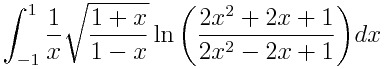

This is a tough one. As you can see [here](http://residuetheorem.com/2013/11/16/a-crazy-ass-integral-the-evaluation-of-which-got-a-lot-of-love-at-math-se/), to obtain the analytical solution of this integral, we must deal with some high level math skills. This generally takes a lot of time and in the real world we are most of the time interested only in the numerical value. In this particular case, another thing to notice is that using the substitution x = cos(θ) we can reach more precision and the integral becomes: 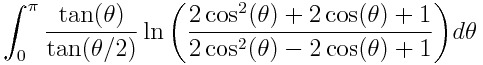
First declare the true result and then the function and the interval. We call the integral function with 15 points. The default arguments are points = 3, tolerance = 1e-9 and depth = 10. At last but not least, we compare the estimated error with the true error.

In [2]:
############# Function 1 #############

print("###Integrating the first function...\n")

phi = (1 + m.sqrt(5)) / 2
acot = lambda x: m.pi/2 - m.atan(x)
true_res = 4 * m.pi * acot(m.sqrt(phi))

a = 0
b = m.pi

func = lambda x: m.tan(x) / m.tan(x/2) * m.log((2*m.cos(x)**2 + 2*m.cos(x) + 1) / (2*m.cos(x)**2 - 2*m.cos(x) + 1))

[result, error] = time_integral(1000, func, a, b, points=15)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)

###Integrating the first function...

Average time (in us):  416.1459000000143 +- 127.49561951764417
Result: 8.372211626601276 
Est. Error: 4.968065958621537e-10 
True Error: 1.7763568394002505e-15


### Second example

In the second example our aim is to solve the [integral](https://math.stackexchange.com/questions/464769/how-to-prove-int-01-tan-1-left-frac-tanh-1x-tan-1x-pi-tanh-1) 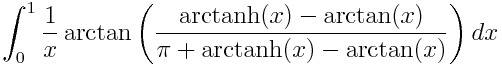
We follow the same steps as before but this time, the default depth isn't enough to compute the integral. We set it to 50 and lower the tolerance to 1e-15 to reach a very high precision.

In [3]:
############# Function 2 #############

print("\n###Integrating the second function...\n")

true_res = (m.pi / 8) * m.log(m.pi**2 / 8)

a = 0
b = 1

func = lambda x: m.atan( (m.atanh(x) - m.atan(x)) / (m.pi + m.atanh(x) - m.atan(x)) ) / x

[result, error] = time_integral(1000, func, a, b, points=10, tolerance=1e-15, depth=50)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)


###Integrating the second function...

Average time (in us):  2647.538400000034 +- 424.63969776547987
Result: 0.08247396606843829 
Est. Error: 5.237712209763384e-16 
True Error: -4.3021142204224816e-16


### Third example

Finally we'll tackle a polynomial function with infinity interval ([analytical solution](https://math.stackexchange.com/questions/266181/a-nasty-integral-of-a-rational-function)): 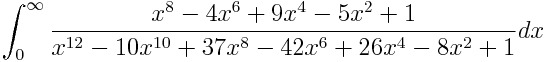 
The math module have the infinity macro and can handle this kind of problem. Again, we took the same steps from the previous examples, but this time the tolerance was lowered without the need to increase the depth of the adaptive algorithm.

In [4]:
############# Function 3 #############

print("\n###Integrating the third function...\n")

true_res = m.pi / 2

a = 0
b = m.inf

func = lambda x: (x**8 - 4*x**6 + 9*x**4 - 5*x**2 + 1) / (x**12 - 10*x**10 + 37*x**8 - 42*x**6 + 26*x**4 - 8*x**2 + 1)

[result, error] = time_integral(1000, func, a, b, points=10, tolerance=1e-15)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)


###Integrating the third function...

Average time (in us):  2539.410600000046 +- 382.7272843445907
Result: 1.5707963267948968 
Est. Error: 6.149594722337781e-16 
True Error: 2.220446049250313e-16


## Going further

Try yourself to integrate other functions with different parameters. See what happens when there's more points and try to explain it. This is a very good exercise. This is enough now. Good practice!